In [5]:
# Bibliotecas
from bibkmis.auxkmis import *
from bibkmis.typeskmis import SOLUCAO, KMIS

import ast                      # Ler os litearias de tipos simples
import os                       # Controle de pastas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np              # Principal para ferramentas matematicas
from tqdm import tqdm           # Barrinha de progresso

In [6]:
# Restaurando Instâncias para consulta
dictI = {
  "id": [], "kmis": [], "p": [], "k": [],
  "|L|": [], "|R|": [], "L": [], 'temSol': [], 'classe': []
}
dfI = pd.DataFrame(columns = list(dictI.keys()))
# ==== Carregamento de Instâncias Salvas =====
conv = {
  'L'     : ast.literal_eval,
  'temSol': ast.literal_eval,
  'L_b14' : ast.literal_eval,
  'Llabel': ast.literal_eval,
  'Rlabel': ast.literal_eval
}
try:
  dfI = pd.read_csv('instancias.csv', converters=conv)
  print(f'Leitura de instancias.csv ({dfI.shape[0]} linhas) bem sucedida.')
except:
  print('\n\n\t\tArquivo instancias não encontrado!!\n\n')
  assert dfI.shape[0]>0 , "Sem instâncias não continua! Peque o arquivo 'instancias.csv'."

# Reinstanciar objetos KMIS a partir das linhas do CSV
dictI['kmis_b14'] = []
with tqdm(total = dfI.shape[0], smoothing = 0.001, desc="Reconstruindo Instâncias") as pbar:
  for _, row in dfI.iterrows():
    kmis = KMIS(row['|L|'], row['|R|'], row['p'], row['k'], row['L'])
    kmis_reduzido = KMIS(row['|L|_b14'], row['|R|_b14'], row['p'], row['k'], row['L_b14'])
    kmis_reduzido.Llabel = row['Llabel_b14']
    kmis_reduzido.Rlabel = row['Rlabel_b14']
    dictI['kmis'].append(kmis)
    dictI['kmis_b14'].append(kmis_reduzido)
    pbar.update(1)

dfI['kmis'] = dictI['kmis']
dfI['kmis_b14'] = dictI['kmis_b14']

Leitura de instancias.csv (540 linhas) bem sucedida.


Reconstruindo Instâncias: 100%|██████████| 540/540 [00:02<00:00, 207.03it/s] 


In [9]:
# Leitura das tabelas:
try:
  dfAT = pd.read_csv('teste_parametros.csv')
  dfRT = pd.read_csv('resultados.csv')
  dfIRT = pd.read_csv('resultados_reduzidas.csv')
except:
  print('Tem arquivo faltante!')

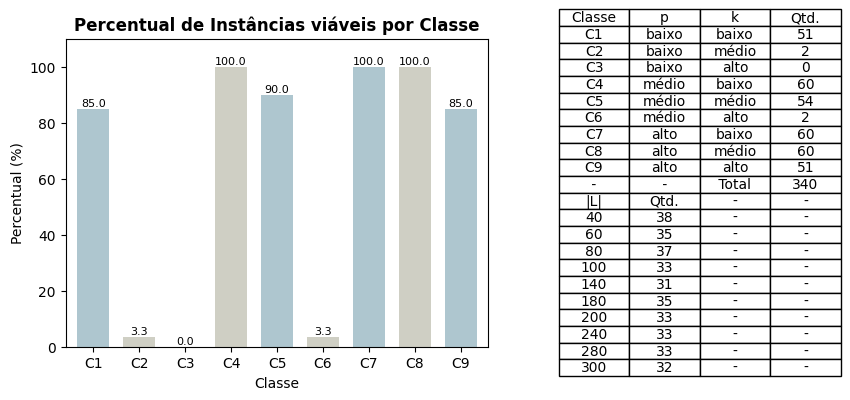

In [11]:
"""Caracteristicas das Instâncias"""

# ========= Gráfico  ===========
# Contagens por classe
tamanhos_L = dfI[dfI['temSol']]['|L|'].value_counts().reset_index().sort_values(by='|L|')
MAX_TAMANHO_L : int = int(tamanhos_L['|L|'].max())
qtdTotal = dfI.groupby('classe')['temSol'].count()
qtdTrue  = dfI[dfI['temSol']].groupby('classe')['temSol'].count()
qtdTrue  = qtdTrue.reindex(dfI['classe'].unique(), fill_value=0)
percentual = (qtdTrue/qtdTotal)*100
percentual = percentual.astype(float)

# Criando a figura
_, ax = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'width_ratios': [3, 2]})

# Gráfico de barras
cores = ['#AEC6CF', '#CFCFC4']
percentual.plot(kind='bar', color=cores[:len(percentual)], ax=ax[0], width=0.7)

for i, v in enumerate(qtdTrue):
    ax[0].text(i, percentual.iloc[i] + 1, f'{percentual.iloc[i]:.1f}', ha='center', fontsize=8)

ax[0].set_xticklabels(percentual.index, rotation=0)
ax[0].set_xlabel('Classe')
ax[0].set_ylabel('Percentual (%)')
ax[0].set_title('Percentual de Instâncias viáveis por Classe', fontweight='bold')
ax[0].set_ylim(0, 110)

# Construindo a tabela
Clabel = {0.1:'baixo', 0.4:'médio', 0.7:'alto'}
tabela_dados = [[v, f'{Clabel[k[0]]}', f'{Clabel[k[1]]}'] for k, v in classes.items()]
for i in tabela_dados:
    i.append(str(qtdTrue.loc[i[0]]))
tabela_dados.append([' - ', ' - ', ' Total ', f'{qtdTrue.sum()}'])

# Adicionando os tamanhos únicos de |L|
tabela_dados.append(['|L|', 'Qtd.', '-', '-'])
for _, row in tamanhos_L.iterrows():
    tabela_dados.append([f'{row["|L|"]}', row['count'],'-', '-'])

# Exibindo a tabela com destaque visual
col_labels = ['Classe', 'p', 'k', 'Qtd.']
ax[1].axis('tight')
ax[1].axis('off')
ax[1].table(cellText=tabela_dados,
            colLabels=col_labels,
            loc='center', cellLoc='center')

plt.show()

count    340.000000
mean       1.266401
std        3.000396
min        0.001000
25%        0.031283
50%        0.162001
75%        0.817853
max       24.893998
Name: tempo_reducao, dtype: float64
c_change
C7  & C7    60
C4  & C4    60
C8  & C8    60
C5  & C5    51
C9  & C9    51
C1  & C1    42
C1  & C5     5
C1  & C4     3
C6  & C9     2
C5  & C9     2
C2  & C9     1
C2  & C5     1
C1  & C9     1
C5  & C8     1
Name: count, dtype: int64


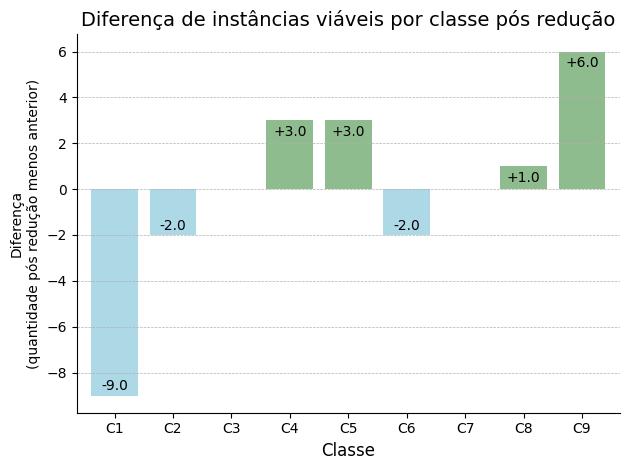

In [12]:

"""Analise da Redução"""
# =============================================================================== 
dfI_temSol = dfI[dfI['temSol']].reset_index()
print((dfI_temSol['tempo_reducao']).describe())
#display(dfI_temSol[['classe', 'classe_b14']])
dfReducao = pd.DataFrame({'c_change':dfI_temSol[['classe', 'classe_b14']].apply(lambda x: f'{x.iloc[0]}  & {x.iloc[1]}', axis=1)})
print(dfReducao.value_counts())

tamanhos_L_b14 = dfI_temSol['|L|_b14'].value_counts().reset_index().sort_values(by='|L|_b14')
qtdTotal_b14 = dfI.groupby('classe')['id'].count()
qtdTrue_b14  = dfI_temSol.groupby('classe_b14')['id'].count()
qtdTrue_b14  = qtdTrue_b14.reindex(dfI['classe'].unique(), fill_value=0)
percentual_b14 = (qtdTrue_b14/qtdTotal_b14)*100
percentual_b14 = percentual_b14.astype(float)
change_b14 = (qtdTrue_b14 - qtdTrue).astype(float)

# Cores condicionais
colors = ['lightblue' if val < 0 else 'darkseagreen' for val in change_b14]

# Criação do gráfico
fig, ax = plt.subplots()
change_b14.plot(kind='bar', ax=ax, color=colors, width=0.8)
# Adiciona os valores sobre ou dentro das barras
for i, val in enumerate(change_b14):
  if val !=0:
    ax.text(i, val-0.8 if val >= 0 else val + 0.7,  # Ajuste da posição vertical
            f'+{val}' if val >= 0 else f'{val}',                      # Valor formatado
            ha='center', va='bottom' if val >= 0 else 'top',  # Alinhamento vertical
            fontsize=10, color='black')         # Estilo do texto

# Ajustes estéticos conforme ABNT
ax.set_xticks(range(len(change_b14.index)))
ax.set_xticklabels(change_b14.index, rotation=0, fontsize=10)
ax.set_xlabel('Classe', fontsize=12)
ax.set_ylabel('Diferença\n(quantidade pós redução menos anterior)', fontsize=10)
ax.set_title('Diferença de instâncias viáveis por classe pós redução', fontsize=14)

# Adição de grade (comumente usada para facilitar leitura)
ax.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)

# Remoção da borda superior e direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
# plt.savefig('tamanho_classe_diferenca_pos_reducao.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [17]:
""" Analise dos resultados geral"""

# ===========================================================================================
assert isinstance(dfRT, pd.DataFrame), '\t ⚠️ DataFrame do teste final não definido.'
dfR_hi = dfRT.groupby(['idH', 'idI'])[['val', 'time']].apply(junta_repeticoes).reset_index()
dfR_h  = dfR_hi.groupby(['idH'])[['vmin', 'vavg', 'vmax', 'tavg']].apply(medias).reset_index()
dfR_i  = dfR_hi.groupby(['idI'])[['vmin', 'vavg', 'vmax', 'tavg']].apply(melhor_por_instancia).reset_index()
# Comparações
cmp = dfR_hi.merge(dfR_i, on=['idI'])
cmp['eq_vmin'] = cmp['vmin'] == cmp['vmin_max']
cmp['eq_vmax'] = cmp['vmax'] == cmp['vmax_max']
cmp['eq_vavg'] = np.isclose(cmp['vavg'], cmp['vavg_max'], atol=1e-4)
cmp['eq_tavg'] = np.isclose(cmp['tavg'], cmp['tavg_min'], atol=1e-4)

# Contagem e merge final
cnt = cmp.groupby(['idH'])[['eq_vmin', 'eq_vavg', 'eq_vmax', 'eq_tavg']].sum().rename(columns=lambda c: 'cnt_' + c[3:]).reset_index()
dfR = dfR_h.merge(cnt, on=['idH'])
df_limites = limites_argumento(dfR).to_frame().T
df_score = dfR.merge(df_limites, how='cross')
dfR['score'] = df_score.apply(score_time_off, axis=1)

# dfR.to_csv('resultados_avaliados_geral.csv', index = False)
display(dfR.sort_values('score', ascending=False))

,idH,mvmin,mvavg,mvmax,mtavg,cnt_vmin,cnt_vavg,cnt_vmax,cnt_tavg,score
8,GRASP_RG_VND2,5.982353,6.132941,6.273529,5.295121,303,276,320,0,100.00
7,GRASP_RG_VND,5.947059,6.097647,6.247059,5.295342,291,259,313,0,84.31
6,GRASP_RG_TS,5.944118,6.073824,6.229412,5.293436,292,242,305,0,75.46
2,ANT2_VND2,5.835294,6.025294,6.214706,5.286045,255,211,301,0,44.57
9,KIEst,5.932353,5.932353,5.932353,0.348077,288,237,235,340,32.85
0,ANT2_TS,5.800000,5.996176,6.208824,5.286823,243,197,300,0,32.22
5,ANT_VND2,5.794118,5.985588,6.167647,5.286219,244,206,288,0,29.32
3,ANT_TS,5.785294,5.980294,6.176471,5.287267,242,201,292,0,27.49
1,ANT2_VND,5.805882,5.985294,6.138235,5.285068,247,201,280,0,26.90
4,ANT_VND,5.779412,5.955588,6.152941,5.284909,240,203,287,0,22.71


In [15]:
""" Analise dos resultados por classe"""
# ===========================================================================================
dfRT_c = dfRT.merge(dfI[['id', 'classe']], left_on='idI', right_on='id').drop('id', axis=1)
dfR_hi = dfRT_c.groupby(['classe', 'idH', 'idI'])[['val', 'time']].apply(junta_repeticoes).reset_index()
dfR_i  = dfR_hi.groupby(['idI'])[['vmin', 'vavg', 'vmax', 'tavg']].apply(melhor_por_instancia).reset_index()
dfR_h_c  = dfR_hi.groupby(['classe','idH'])[['vmin', 'vavg', 'vmax', 'tavg']].apply(medias).reset_index()
cmp = dfR_hi.merge(dfR_i, on=['idI'])
cmp['eq_vmin'] = cmp['vmin'] == cmp['vmin_max']
cmp['eq_vmax'] = cmp['vmax'] == cmp['vmax_max']
cmp['eq_vavg'] = np.isclose(cmp['vavg'], cmp['vavg_max'], atol=1e-4)
cmp['eq_tavg'] = np.isclose(cmp['tavg'], cmp['tavg_min'], atol=1e-4)
cnt = cmp.groupby(['classe', 'idH'])[['eq_vmin', 'eq_vavg', 'eq_vmax', 'eq_tavg']].sum().rename(columns=lambda c: 'cnt_' + c[3:]).reset_index()
dfR_c = dfR_h_c.merge(cnt, on=['classe', 'idH'])
df_limites = dfR_c.groupby(['classe'])[dfR_c.columns[2:]].apply(limites_argumento)
df_score = dfR_c.merge(df_limites, left_on='classe', right_index=True)
dfR_c['score'] = df_score.apply(score_time_off, axis=1)

Score_PerClass = pd.DataFrame({'idH':dfR_c['idH'].unique()})
for i in dfR_c['classe'].unique():
  subset = pd.DataFrame(dfR_c[dfR_c['classe'] == i][['classe', 'idH', 'score']])
  subset = subset.rename(columns = {'score':f'score_{i}'})
  # display(subset)
  Score_PerClass = Score_PerClass.merge(subset, on='idH', how='left').drop('classe',axis=1)
# Score_PerClass = Score_PerClass.drop(['score_C2','score_C6'], axis=1)
Score_PerClass['avg'] = Score_PerClass.apply(lambda x: x[1:].mean(), axis=1)
Score_PerClass.to_csv('resultados_avaliados_por_classe.csv', index = False)
display(Score_PerClass.sort_values('avg', ascending=False))

,idH,score_C1,score_C2,score_C4,score_C5,score_C6,score_C7,score_C8,score_C9,avg
8,GRASP_RG_VND2,95.71,100.0,92.74,95.38,100.0,100.00,95.90,100.00,97.46625
7,GRASP_RG_VND,69.35,100.0,98.33,96.96,100.0,55.69,94.97,97.28,89.07250
6,GRASP_RG_TS,60.92,100.0,86.64,89.86,100.0,65.35,68.50,68.85,80.01500
9,KIEst,69.35,100.0,40.38,78.09,100.0,6.74,42.94,34.99,59.06125
2,ANT2_VND2,3.87,100.0,36.15,13.95,100.0,61.29,48.12,74.66,54.75500
0,ANT2_TS,37.14,100.0,25.42,12.24,100.0,57.26,21.81,49.19,50.38250
5,ANT_VND2,10.36,100.0,37.02,28.13,100.0,31.67,39.56,36.63,47.92125
1,ANT2_VND,12.30,100.0,34.57,0.48,100.0,33.87,33.21,51.97,45.80000
3,ANT_TS,10.36,100.0,34.91,14.68,100.0,34.92,33.61,35.89,45.54625
4,ANT_VND,14.28,100.0,38.77,11.99,100.0,24.16,24.83,49.29,45.41500
